<a href="https://colab.research.google.com/github/winengewe/Coffee-Shop/blob/main/20251106_Exercise_2_Redwine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2 - Red Wine
1.We are going to see if we can use the Alcohol level of the wine to predict the quality for selling purposes.

2.Load dataset

3.Use describe and info to look at data

4.Check for missing data and drop if required

5.Check for correlations

6.Set x as alcohol and y as quality

7.Plot this as a scatter chart

8.We are only interested in wines that have a quality value above 4 as below this they are Table Wine. df=df[df['quality']>4]

9.Check correlation value now

10.Split data into an 80/20 split for train/test

11.Create a Linear model using training data

12.Using test data generate y_predict

13.Score the Model

14.Plot the x_test & y_test on same chart as x_test, y_predict

15.Would you recommend this model for this grape variety ?

In [ ]:
# 1.We are going to see if we can use the Alcohol level of the wine to predict the quality for selling purposes.
# key words 'Alcohol level' to predict quality for sell
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
# 2.Load dataset
df = pd.read_csv('gdrive/My Drive/GC NPA AI 2025/winequality-red.csv')

# 3.Use describe and info to look at data
print(df.head()) # look at data
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# 4.Check for missing data and drop if required
print("\nMissing values:\n", df.isnull().sum()) # Show the total of missing values for each column
df=df.dropna()


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# 5.Check for correlations
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# 6.Set x as alcohol and y as quality
x=df[['alcohol']].to_numpy()
y=df[['quality']].to_numpy()

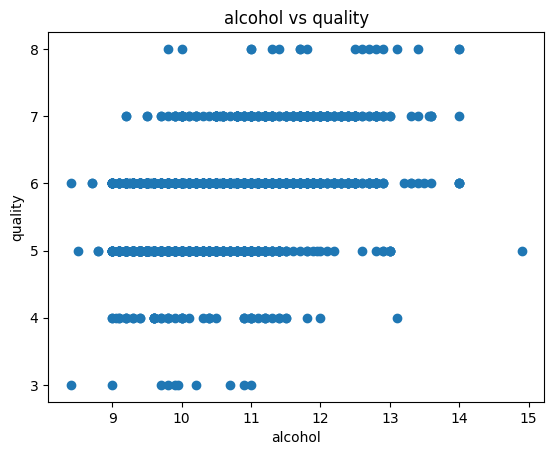

In [ ]:
# 7.Plot this as a scatter chart
plt.title("alcohol vs quality")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.scatter(x,y)

In [ ]:
# 8.We are only interested in wines that have a quality value above 4 as below this they are Table Wine. df=df[df['quality']>4]
df=df[df['quality']>4]
x=df[['alcohol']].to_numpy()
y=df[['quality']].to_numpy()

In [ ]:
# 9.Check correlation value now
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.251626,0.673132,0.126810,0.092965,-0.169612,-0.124119,0.666539,-0.684033,0.179428,-0.052090,0.117889
volatile acidity,-0.251626,1.000000,-0.550048,0.008315,0.063412,0.014511,0.110979,0.032606,0.211491,-0.251630,-0.217303,-0.341017
citric acid,0.673132,-0.550048,1.000000,0.149887,0.190324,-0.082991,0.017057,0.361910,-0.532597,0.295776,0.120015,0.209150
residual sugar,0.126810,0.008315,0.149887,1.000000,0.063777,0.202525,0.204487,0.369720,-0.091153,0.008197,0.029812,0.026576
chlorides,0.092965,0.063412,0.190324,0.063777,1.000000,-0.006910,0.048477,0.200714,-0.257193,0.343779,-0.223502,-0.128728
free sulfur dioxide,-0.169612,0.014511,-0.082991,0.202525,-0.006910,1.000000,0.667220,-0.027915,0.085302,0.028460,-0.068698,-0.097014
total sulfur dioxide,-0.124119,0.110979,0.017057,0.204487,0.048477,0.667220,1.000000,0.067184,-0.055681,0.024247,-0.211664,-0.252287
density,0.666539,0.032606,0.361910,0.369720,0.200714,-0.027915,0.067184,1.000000,-0.337785,0.140439,-0.498434,-0.199512
pH,-0.684033,0.211491,-0.532597,-0.091153,-0.257193,0.085302,-0.055681,-0.337785,1.000000,-0.173955,0.197487,-0.016129
sulphates,0.179428,-0.251630,0.295776,0.008197,0.343779,0.028460,0.024247,0.140439,-0.173955,1.000000,0.102459,0.251410


In [ ]:
# 10.Split data into an 80/20 split for train/test
split=int(0.8*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 11.Create a Linear model using training data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# 12.Using test data generate y_predict
y_pred=model.predict(x_test)

In [ ]:
# 13.Score the Model
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.2973816475330715
0.1175138397455524


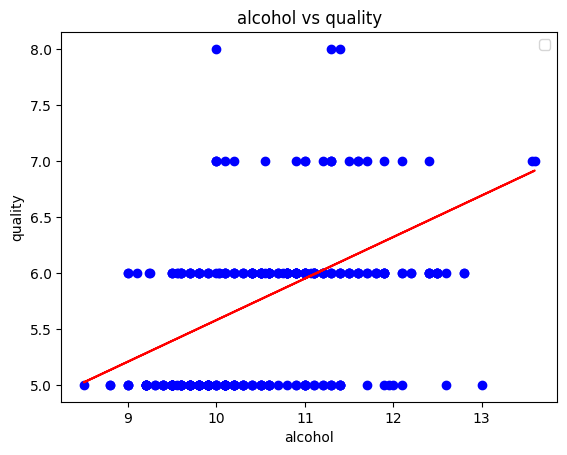

In [ ]:
# 14.Plot the x_test & y_test on same chart as x_test, y_predict
plt.title("alcohol vs quality")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.legend(['Actual','Predicted'])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')

In [ ]:
# 15.Would you recommend this model for this grape variety ?
print('No, as limited Data Set, the Model is not very good and shows that there is not a direct link between the quality and alcohol content of the wine from this grape')

No, as limited Data Set, the Model is not very good and shows that there is not a direct link between the quality and alcohol content of the wine from this grape


# Decision Tree

1.0
0.5714285714285714


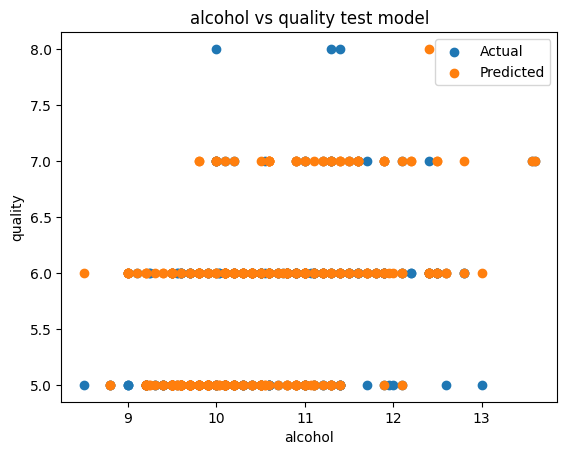

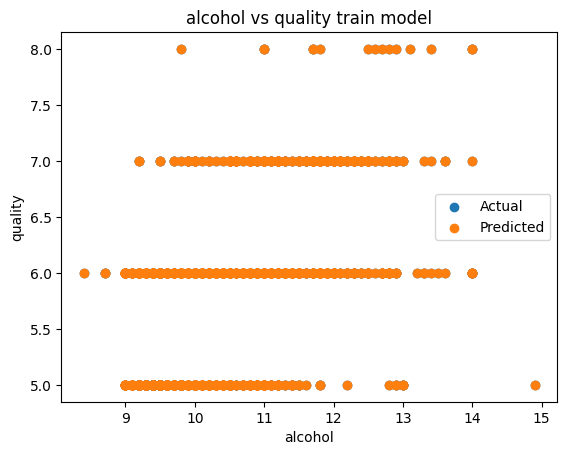

In [ ]:
x = df.drop(columns=['quality']).to_numpy()
# x = df.drop(columns=['quality']),to_numpy() # set the x values as all except quality
y=df[['quality']].to_numpy()

split=int(0.8*len(df)) # find a 80% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print(model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print(model.score(x_test,y_test))

#plt.scatter(x_train[:,0],x_train[:,1],alpha=0.2,c=y_pred_train,cmap='jet')
#plt.show()
#plt.scatter(x_test[:,0],x_test[:,1],alpha=0.2,c=y_pred_test,cmap='jet')
#plt.show()

plt.scatter(x_test[:,10],y_test)
plt.scatter(x_test[:,10],y_pred_test)
plt.title('alcohol vs quality test model')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,10],y_train)
plt.scatter(x_train[:,10],y_pred_train)
plt.title('alcohol vs quality train model')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend(['Actual','Predicted'])
plt.show()

Compared to Linear Regression charts, DecisionTree Classifier charts are better. The model is more visually appealing as the points are more widely distributed.

The model shows that there is more links between the alcohol and quality, leads to a higher model score.

# Random Forest

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score:  1.0
Test model score:  0.6103896103896104


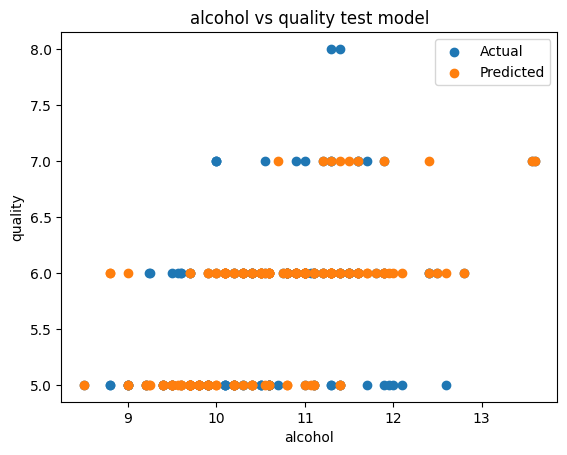

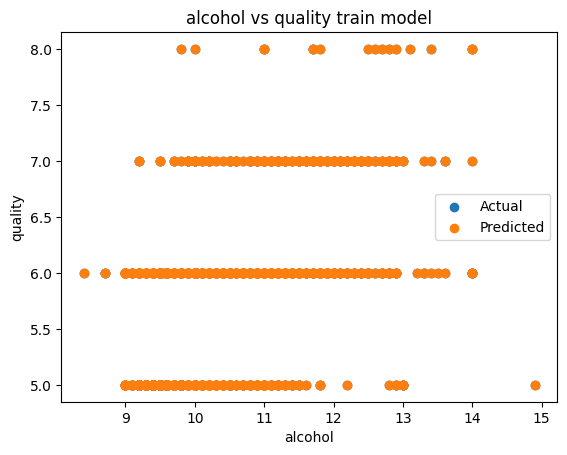

In [ ]:
x = df.drop(columns=['quality']).to_numpy()
# x = df.drop(columns=['quality']),to_numpy() # set the x values as all except quality
y=df[['quality']].to_numpy()

split=int(0.9*len(df)) # find a 80% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score: ",model.score(x_test,y_test))

#plt.scatter(x_train[:,0],x_train[:,1],alpha=0.2,c=y_pred_train,cmap='jet')
#plt.show()
#plt.scatter(x_test[:,0],x_test[:,1],alpha=0.2,c=y_pred_test,cmap='jet')
#plt.show()

plt.scatter(x_test[:,10],y_test)
plt.scatter(x_test[:,10],y_pred_test)
plt.title('alcohol vs quality test model')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,10],y_train)
plt.scatter(x_train[:,10],y_pred_train)
plt.title('alcohol vs quality train model')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend(['Actual','Predicted'])
plt.show()

# Compare different Random Forest split

In [ ]:
split=int(0.7*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 70: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 30: ",model.score(x_test,y_test))

split=int(0.8*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 80: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 20: ",model.score(x_test,y_test))

split=int(0.9*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 90: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 10: ",model.score(x_test,y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 70:  1.0
Test model score 30:  0.631236442516269


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 80:  1.0
Test model score 20:  0.6201298701298701


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 90:  1.0
Test model score 10:  0.6103896103896104


# Feature Engineering

In [ ]:
# show average values for the 2 selected features

print("Mean Wine Quality : ", round(df['quality'].mean(),2))
print("Mean Alcohol : ", round(df['alcohol'].mean(),2))

print()
# get new Alcohol level
alcohol = float(input("Enter alcohol level :  "))


# we are using the average values in model to predict a wine quality
predict_Quality_average = model.predict(np.array([[df['fixed acidity'].mean(),df['volatile acidity'].mean(),df['citric acid'].mean(),df['residual sugar'].mean(),df['chlorides'].mean(),df['free sulfur dioxide'].mean(),df['total sulfur dioxide'].mean(),df['density'].mean(),df['pH'].mean(),df['sulphates'].mean(),alcohol]]))
#

print()
print("Your predicted average Wine Quality is : ",round(predict_Quality_average[0],2))
print()




Mean Wine Quality :  5.71
Mean Alcohol :  10.43

Enter alcohol level :  8

Your predicted average Wine Quality is :  6

